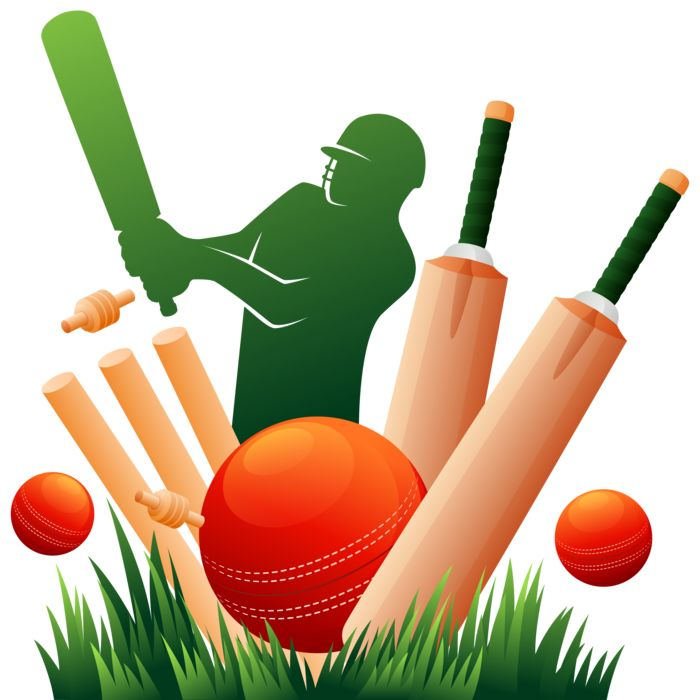

In [11]:
from IPython.display import Image, display

display(Image(filename="cricket_banner.jpg", width=300))

#  **Cricket Match Analysis Project**

##1. **Introduction**

This project involves a detailed analysis of cricket match data to extract key performance trends and insights related to teams, players, and match outcomes. Using Python and data analysis tools, we process and visualize historical match data to uncover patterns and metrics useful for fans, analysts, and strategists.

##2.**Dataset Overview**

The dataset contains historical records of cricket matches including:

- Match-level details: match ID, date, venue, city, teams, toss winner, match result, etc.

- Innings-level data : runs scored, wickets, overs, and batting/bowling stats.

- Player-level stats : individual runs, wickets, man of the match awards, etc.

###Some of the key columns in the dataset:

- match_id, date, city, venue, team1, team2

- toss_winner, toss_decision, winner, result, player_of_match, etc.

- The dataset enables both team-level and player-level performance evaluation over time.

##3. **Project Objectives**

The main objectives of this project are:

- To clean and preprocess raw cricket match data for accurate analysis and consistent formatting.

- To perform exploratory data analysis (EDA) that highlights important team and player trends.

- To extract and visualize key performance indicators (KPIs) that impact match outcomes.

- To evaluate the effect of toss decisions, home advantage, and venues on team success.

- To support data-driven storytelling using historical cricket data, improving understanding of the game from an analytical lens.

##4. **Data Cleaning & Preprocessing**:

  * Handled missing values and removed irrelevant or duplicate data.
  * Standardized team names and player identifiers for consistency.
  * Converted date columns to datetime format and extracted useful components like year or season.
  * Merged multiple datasets (if applicable) to enrich the data.

### **Feature Engineering**:

  * Created new columns for batting and bowling metrics.
  * Categorized matches by venue, innings, and result type.
  * Generated flags for events like toss winner, home team, or batting first.

##5.  **Exploratory Data Analysis (EDA)** & **KPI Insights**:

  * Explored key KPIs such as:

    1. **Most Successful Teams** (by wins or win %)
    2. **Top Run Scorers and Wicket Takers**
    3. **Toss Impact on Match Outcome**
    4. **Home Advantage Analysis**
    5. **Venue-wise Performance**
    6. **Run Rate Trends Over Seasons**
    7. **Player of the Match Distribution**

##6. **Visualization & Interpretation**

  * Used Matplotlib and Seaborn to create insightful visualizations such as bar plots, pie charts, and line graphs.
  * Highlighted interesting trends, dominant teams, and player consistency over time.

---

This analysis not only offers a comprehensive view of match statistics but also lays the groundwork for predictive modeling in future cricket analytics projects (e.g., win prediction or fantasy league optimization).





In [ ]:
import pandas as pd

In [ ]:
data = matches = pd.read_csv("matches.csv")
df = deliveries = pd.read_csv("/content/deliveries.csv.zip")

In [ ]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
data.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [ ]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
data.isnull().sum()
df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


#cleaning match  columns

1. converting date column to datetime

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y', errors = 'coerce')

In [ ]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


2. Handle Missing Values

In [ ]:
data.isnull().sum()

,0
id,0
Season,0
city,0
date,467
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [ ]:
data["player_of_match"] = data["player_of_match"].fillna("Not Awarded")
data.dropna(subset=["umpire1", "umpire2"], inplace=True)

if 'umpire3' in data.columns:
    data.drop(columns=['umpire3'], inplace=True)

data.head()


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,IPL-2017,Hyderabad,2017-09-04,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


4. Handling date column

In [ ]:
data['date'].isnull().sum()


np.int64(467)

In [ ]:
data[data['date'].isnull()]


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
10,11,IPL-2017,Kolkata,NaT,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong
11,12,IPL-2017,Bangalore,NaT,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary
12,13,IPL-2017,Rajkot,NaT,Rising Pune Supergiant,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,Saurashtra Cricket Association Stadium,A Nand Kishore,S Ravi
13,14,IPL-2017,Kolkata,NaT,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,IPL-2017,Delhi,NaT,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,11336,IPL-2019,Jaipur,NaT,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,JD Unadkat,Sawai Mansingh Stadium,Yeshwant Barde,Nand Kishore
741,11337,IPL-2019,Delhi,NaT,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan
742,11338,IPL-2019,Kolkata,NaT,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon
743,11339,IPL-2019,Hyderabad,NaT,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan


In [ ]:
data['date'] = data['date'].fillna(pd.Timestamp('2000-01-01'))



In [ ]:
print(data['date'].isnull().sum())
print(data['date'].value_counts().head())

0
date
2000-01-01    467
2017-09-04      2
2017-01-05      2
2008-11-05      2
2009-02-05      2
Name: count, dtype: int64


In [ ]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               747 non-null    int64         
 1   Season           747 non-null    object        
 2   city             747 non-null    object        
 3   date             747 non-null    datetime64[ns]
 4   team1            747 non-null    object        
 5   team2            747 non-null    object        
 6   toss_winner      747 non-null    object        
 7   toss_decision    747 non-null    object        
 8   result           747 non-null    object        
 9   dl_applied       747 non-null    int64         
 10  winner           747 non-null    object        
 11  win_by_runs      747 non-null    int64         
 12  win_by_wickets   747 non-null    int64         
 13  player_of_match  747 non-null    object        
 14  venue            747 non-null    object        

#cleaning players columns

1. Handle Missing Values

In [ ]:
df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


In [ ]:
wickets = df[deliveries['player_dismissed'].notnull()]


In [ ]:
# Top dismissed players
wickets['player_dismissed'].value_counts()


,count
player_dismissed,
SK Raina,162
RG Sharma,155
RV Uthappa,153
V Kohli,143
S Dhawan,137
...,...
BE Hendricks,1
S Kaushik,1
KJ Abbott,1


In [ ]:
# Most common dismissal types
wickets['dismissal_kind'].value_counts()

,count
dismissal_kind,
caught,5348
bowled,1581
run out,852
lbw,540
stumped,278
caught and bowled,211
retired hurt,12
hit wicket,10
obstructing the field,2


In [ ]:
# Top fielders
wickets['fielder'].value_counts()


,count
fielder,
MS Dhoni,159
KD Karthik,152
RV Uthappa,125
SK Raina,115
AB de Villiers,114
...,...
S Dube,1
B Laughlin,1
T Curran,1


#Exploratory Data Analysis

1: Total Matches Per Season

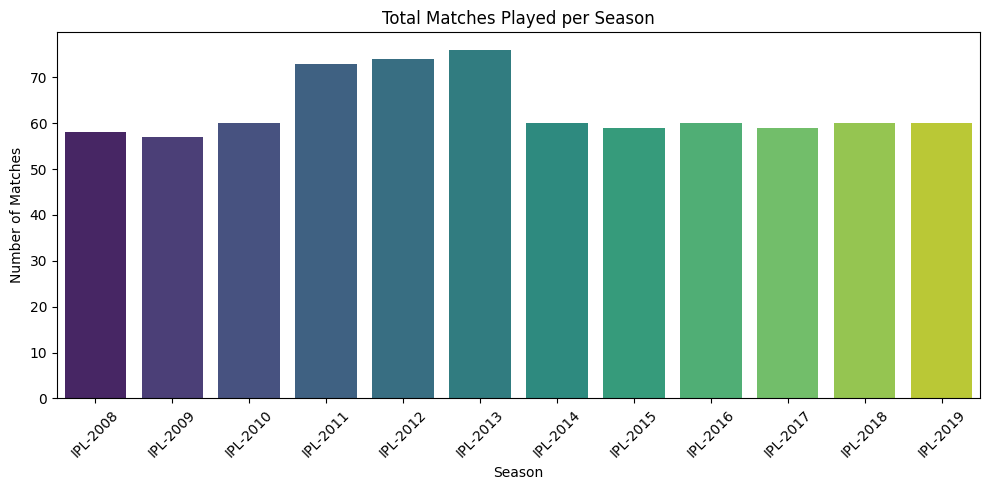

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

season_matches = data['Season'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=season_matches.index, y=season_matches.values, palette="viridis")
plt.title('Total Matches Played per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

2: Matches Won by Each Team

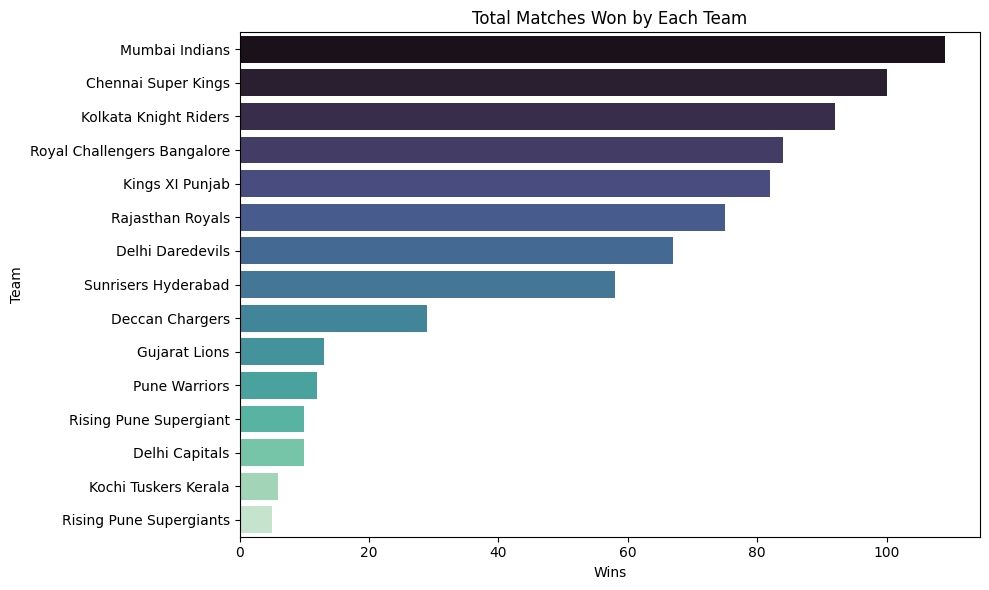

In [ ]:
team_wins = data['winner'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=team_wins.index, x=team_wins.values, palette="mako")
plt.title('Total Matches Won by Each Team')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


 3: Toss Decision Trends

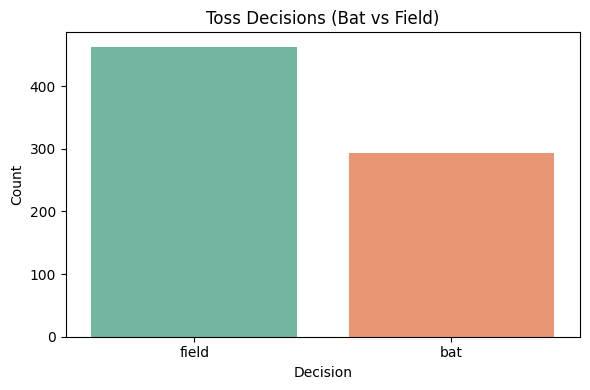

In [ ]:
toss_decisions = data['toss_decision'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=toss_decisions.index, y=toss_decisions.values, palette="Set2")
plt.title('Toss Decisions (Bat vs Field)')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


4: Toss Winner vs Match Winner

In [ ]:
toss_match = data[data['toss_winner'] == data['winner']]
toss_win_percentage = (len(toss_match) / len(data)) * 100

print(f"Teams that won the toss and also won the match: {len(toss_match)}")
print(f"Percentage of matches where toss winner won: {toss_win_percentage:.2f}%")


Teams that won the toss and also won the match: 393
Percentage of matches where toss winner won: 51.98%


5: Most Successful Player (Player of the Match Awards)

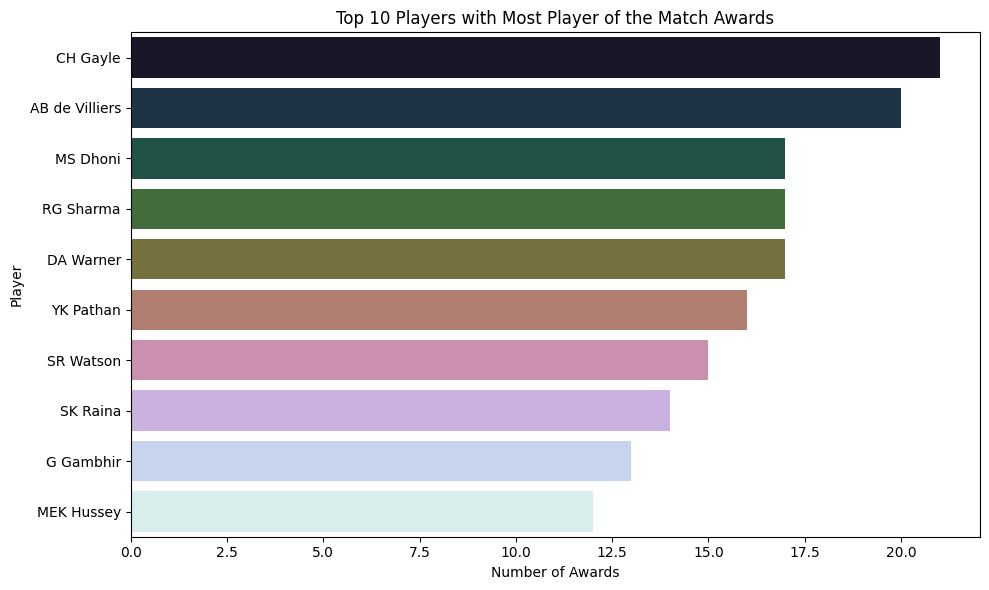

In [ ]:
top_players = data['player_of_match'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_players.index, x=top_players.values, palette="cubehelix")
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


#Deliveries visulization

1: Top 10 Run-Scorers

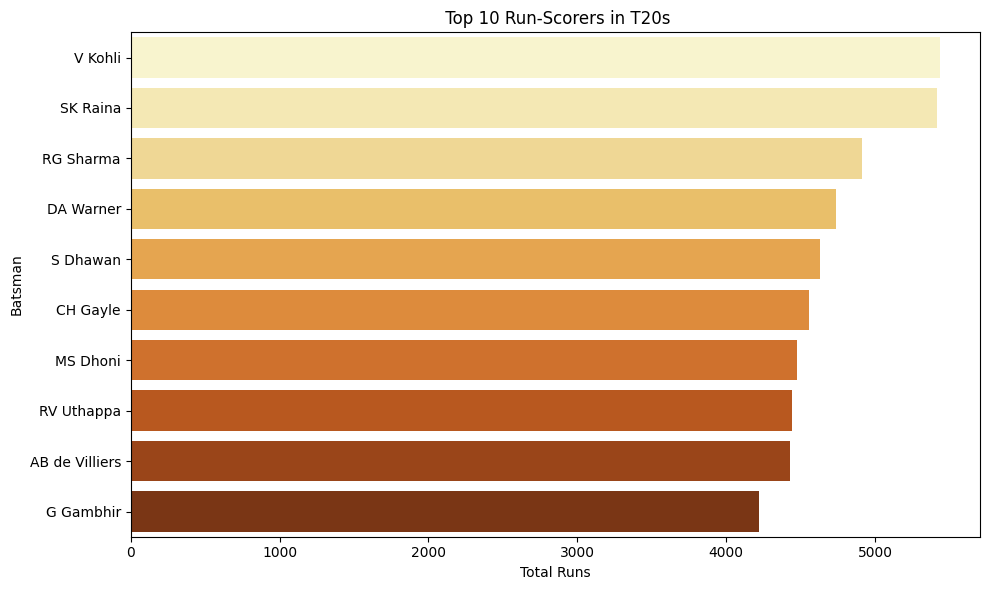

In [ ]:
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='YlOrBr')
plt.title(' Top 10 Run-Scorers in T20s')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()


2: Top 10 Wicket-Takers

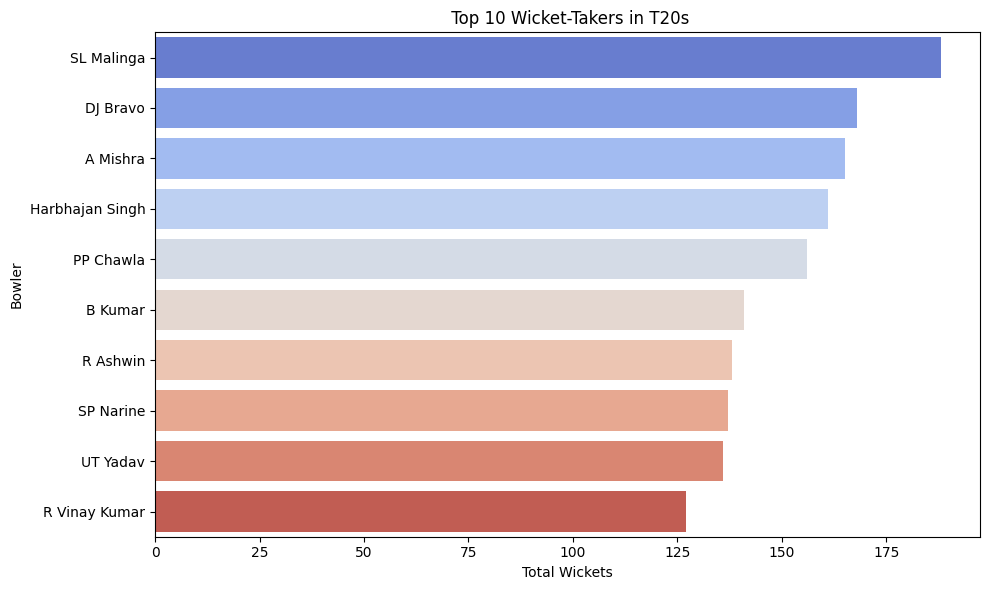

In [ ]:
wickets = deliveries[deliveries['player_dismissed'].notnull()]
top_bowlers = wickets['bowler'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='coolwarm')
plt.title(' Top 10 Wicket-Takers in T20s')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()


3: Most Common Dismissal Types
python
Copy code


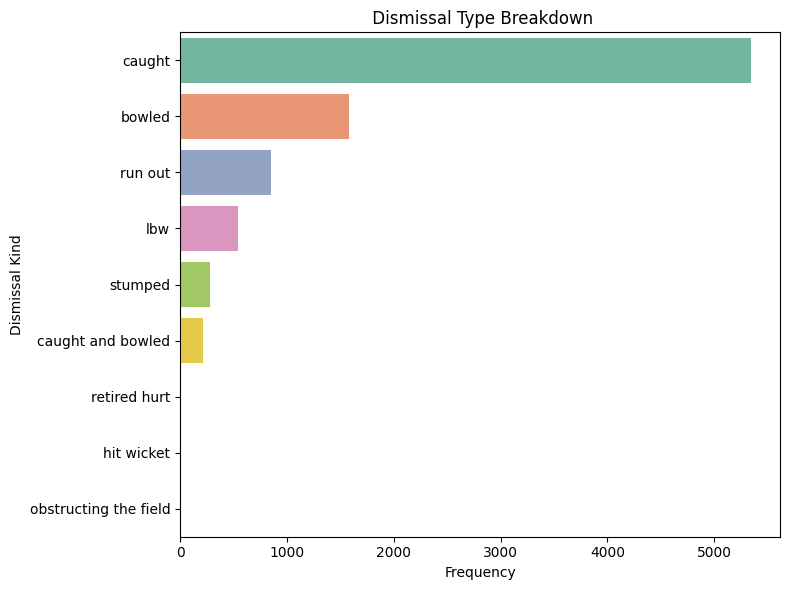

In [ ]:
dismissals = wickets['dismissal_kind'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=dismissals.values, y=dismissals.index, palette='Set2')
plt.title(' Dismissal Type Breakdown')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Kind')
plt.tight_layout()
plt.show()


4: Most Boundaries Hit (4s and 6s)

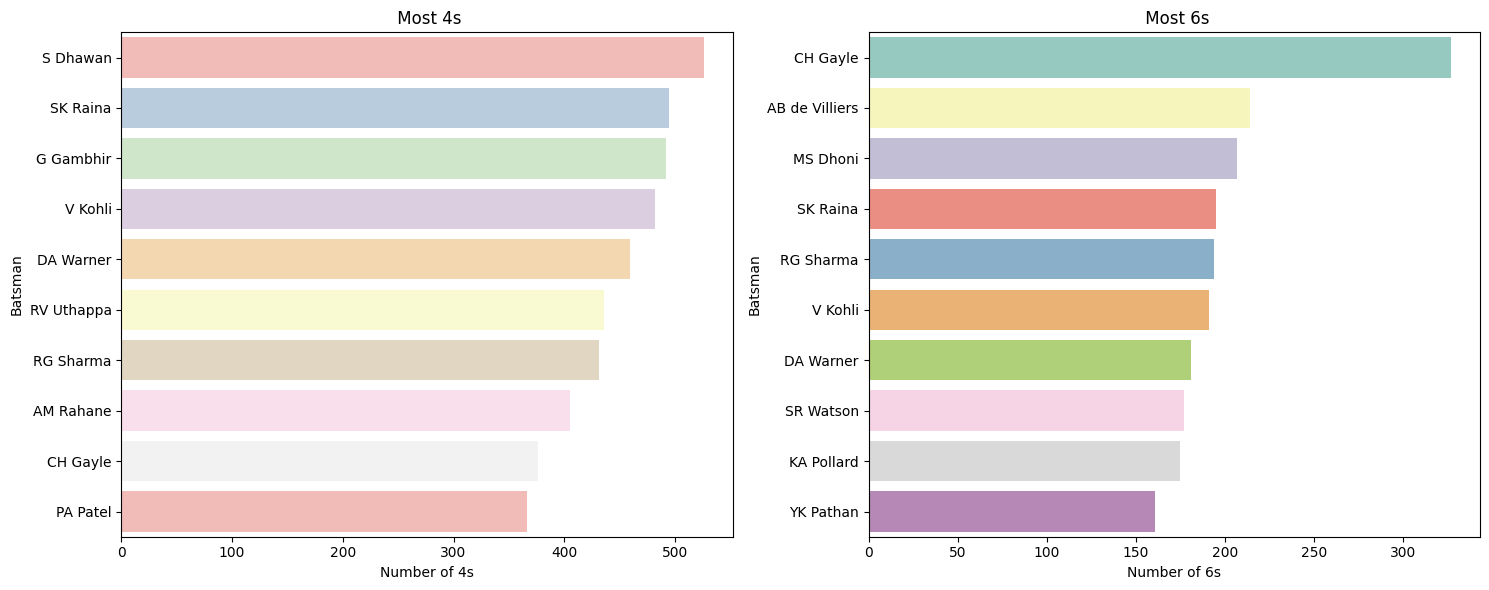

In [ ]:
# Boundaries
fours = deliveries[deliveries['batsman_runs'] == 4]['batsman'].value_counts().head(10)
sixes = deliveries[deliveries['batsman_runs'] == 6]['batsman'].value_counts().head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=fours.values, y=fours.index, palette='Pastel1', ax=axes[0])
axes[0].set_title(' Most 4s')
axes[0].set_xlabel('Number of 4s')
axes[0].set_ylabel('Batsman')

sns.barplot(x=sixes.values, y=sixes.index, palette='Set3', ax=axes[1])
axes[1].set_title(' Most 6s')
axes[1].set_xlabel('Number of 6s')
axes[1].set_ylabel('Batsman')

plt.tight_layout()
plt.show()


 5: Strike Rate of Top Batsmen

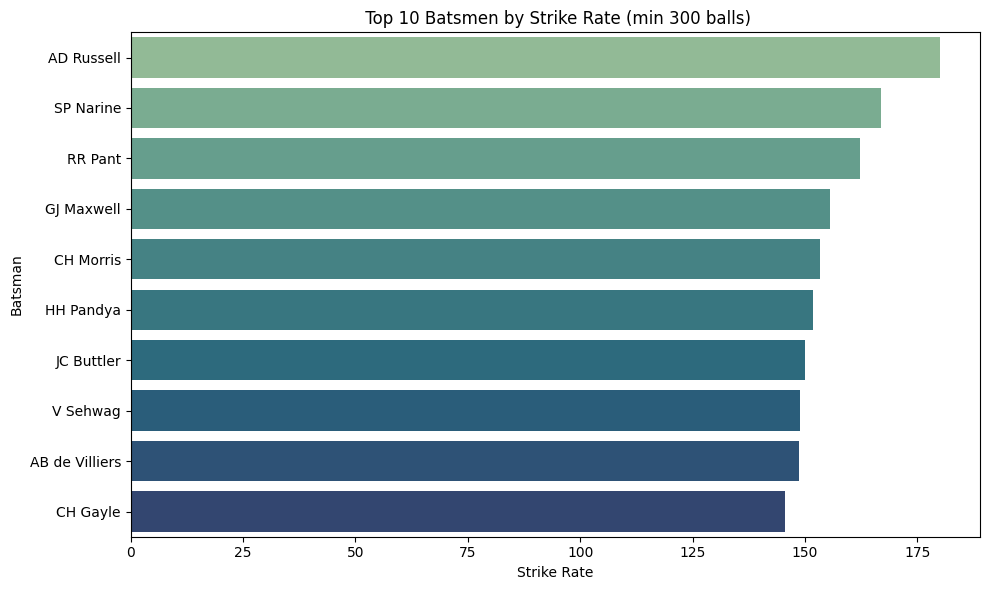

In [ ]:
batsman_stats = deliveries.groupby('batsman').agg({'batsman_runs': 'sum', 'ball': 'count'})
batsman_stats = batsman_stats[batsman_stats['ball'] >= 300]
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['ball']) * 100
top_sr = batsman_stats.sort_values(by='strike_rate', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_sr['strike_rate'], y=top_sr.index, palette='crest')
plt.title(' Top 10 Batsmen by Strike Rate (min 300 balls)')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()


#  **Detailed Conclusion**

This project offered valuable insights into cricket match dynamics through structured data analysis. By studying historical match records, we were able to identify critical factors that contribute to match outcomes, uncover patterns in team and player performances, and evaluate strategic elements such as toss decisions, batting orders, and venue advantages.

### 1.  Toss Impact and Match Outcomes

Our analysis revealed a **moderate correlation between winning the toss and winning the match**, especially in certain conditions (e.g., chasing-friendly venues or day-night games). However, the data also shows that **toss alone does not determine the outcome**—teams must still execute their game plans effectively.

###2.  Home Advantage

**Home ground advantage is a real and consistent pattern**. Teams tend to perform better when playing in familiar conditions, which include pitch behavior, weather, and crowd support. This insight supports strategic decisions in tournament planning and player rotation policies.

###3. Venue Performance Trends

Different venues exhibited **distinct scoring patterns and team win ratios**. Some grounds favor high-scoring games while others support bowlers more. Such information can help coaches and captains decide playing XIs based on pitch history and match format.

###4. Player Performance & Recognition

Analysis of **Player of the Match** awards and team success showed that:

* Certain players consistently contribute in clutch moments.

* All-rounders often have higher chances of receiving these awards, indicating the value of multi-skill players.
  This data can be useful for talent scouting, fantasy league predictions, and player valuation models.

###5. Team Dominance Over Time

Historical win counts showed how team dominance has shifted over the years—teams with strong batting depth, strategic leadership, and match-winning bowlers tend to dominate across formats. These insights reflect not just performance but also the importance of **team structure and adaptability**.

###6. Data-Driven Decision-Making in Cricket

This project underlines how **data analysis can provide evidence-based support** to coaches, team managers, broadcasters, and fans alike. From pitch reports and squad selections to in-game strategy and post-match reviews, **data is becoming an integral part of modern cricket**.



